In [1]:
# importing useful packages
import numpy as np
import sympy as sp
import re

# setting x equal to the symbol x
x = sp.symbols("x")

In [3]:
def divided_diff(data_x, values):
    if (len(values) == 1):
        return values[0]
    else:
        return ((divided_diff(data_x[1:], values[1:]) 
                 - divided_diff(data_x[0:-1],values[0:-1]))/(data_x[-1] - data_x[0]))

In [4]:
def interpolate(data_x, data_y):  
    constants = np.array([])
    c_0 = data_y[0]
    c_1 = (data_y[1] - c_0)/(data_x[1] - data_x[0])
    constants = np.append(constants, [c_0, c_1])
    omegas = np.array([1])
    omega_1 = x - data_x[0]
    omegas = np.append(omegas, omega_1)

    if (len(data_x) <= 2):
        return;

    for i in range(2, len(data_x)):
        if (i == len(data_x) - 1):
            c_i = divided_diff(data_x[0:], data_y[0:])
        else:
            c_i = divided_diff(data_x[0:i+1], data_y[0:i+1])
        
        constants = np.append(constants, c_i)
        omega_i = omegas[i-1] * (x-data_x[i-1])
        omegas = np.append(omegas, omega_i)

    return sp.expand(np.dot(constants, omegas))

In [6]:
# main program

def main():
    data_x = []
    data_y = []
    
    num_inp = int(input("Number of data points (int): "))
    for i in range(1, num_inp+1):
        inp = input(f"Data point {i} (format: (x,y)): ")
        inp = re.sub("[(|)]", "", inp)
        data_point = inp.split(",")
        for i in range(2):
            data_point[i] = data_point[i].strip()
        data_x.append(float(data_point[0]))
        data_y.append(float(data_point[1]))
    print(interpolate(data_x, data_y))

In [7]:
# 4b, interpolating f(x) on the chebyshev nodes
main()

Number of data points (int): 5
Data point 1 (format: (x,y)): (2.074, 1.812)
Data point 2 (format: (x,y)): (2.618, 1.106)
Data point 3 (format: (x,y)): (3.5, 1.189)
Data point 4 (format: (x,y)): (4.382, 3.758)
Data point 5 (format: (x,y)): (4.927, 13.12)
1.18052907259596*x**4 - 14.5745806134148*x**3 + 66.9436901695421*x**2 - 135.466478760135*x + 102.993470927311


#### Kommentar
Det vil si at polynomet i oppgave 4b er $p_c(x)=1.181*x^4 - 14.57*x^3+66.94*x^2-135.5*x+103.0$

In [8]:
# 4c, interpolating f(x) on the equidistributed nodes
main()

Number of data points (int): 5
Data point 1 (format: (x,y)): (2,2)
Data point 2 (format: (x,y)): (2.75, 1.044)
Data point 3 (format: (x,y)): (3.5, 1.189)
Data point 4 (format: (x,y)): (4.25, 2.954)
Data point 5 (format: (x,y)): (5, 16)
1.20388477366255*x**4 - 14.8435226337449*x**3 + 68.1342716049383*x**2 - 137.76446090535*x + 104.477860082305


#### Kommentar
Det vil si at polynomet i oppgave 4c er $p_{eq}(x)=1.204*x^4-14.84*x^3+68.13*x^2-137.8*x+104.5$

Vi vil nå plotte to grafer. Den ene grafen inneholder $d_c(x)= p_c(x) - f(x)$, mens den andre inneholder $d_{eq}(x)=p_{eq}(x) - f(x)$. Samtidig vil også største forskjell bli skrevet ut (globalt toppunkt).

Største error for p_c: 1.0688990920123072
Største error for p_eq: 1.4701654998293758


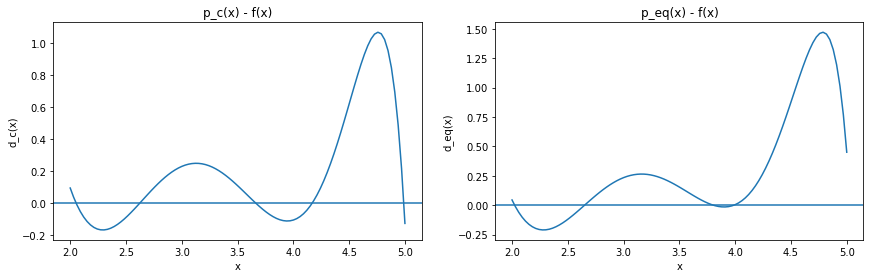

In [19]:
# importerer matplotlib
import matplotlib.pyplot as plt

def f(x):
    return 2**(x**2-6*x+9)

def p_c(x):
    return 1.181*x**4 - 14.57*x**3 + 66.94*x**2 - 135.5*x + 103

def p_eq(x):
    return 1.204*x**4 - 14.84*x**3 + 68.13*x**2 - 137.76*x + 104.5

def d_c(x):
    return p_c(x) - f(x)

def d_eq(x):
    return p_eq(x) - f(x)


x = np.linspace(2, 5, 100)

y_c = np.array([])
y_eq = np.array([])
max_diff_c = 0
max_diff_eq = 0

for num in x:
    num_c = d_c(num)
    num_eq = d_eq(num)
    
    if (abs(num_c) > max_diff_c):
        max_diff_c = num_c
    if (abs(num_eq) > max_diff_eq):
        max_diff_eq = num_eq
    
    y_c = np.append(y_c, num_c)
    y_eq = np.append(y_eq, num_eq)

    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(right=2)
# plot 1
ax1.plot(x, y_c)
ax1.set_xlabel("x")
ax1.set_ylabel("d_c(x)")
ax1.set_title("p_c(x) - f(x)")
ax1.axhline()


#plot 2
ax2.plot(x, y_eq)
ax2.set_xlabel("x")
ax2.set_ylabel("d_eq(x)")
ax2.set_title("p_eq(x) - f(x)")
ax2.axhline()

print("Største error for p_c:", max_diff_c)
print("Største error for p_eq:", max_diff_eq)

Som vi kan se er den største erroren for $p_c(x)$ betydelig mindre enn for $p_{eq}(x)$